11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 51s 57ms/step - accuracy: 0.8713 - loss: 0.4333 - val_accuracy: 0.9855 - val_loss: 0.0512
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9801 - loss: 0.0633 - val_accuracy: 0.9880 - val_loss: 0.0443
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9872 - loss: 0.0413 - val_accuracy: 0.9890 - val_loss: 0.0376
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9902 - loss: 0.0301 - val_accuracy: 0.9898 - val_loss: 0.0387
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9933 - loss: 0.0218 - val_accuracy: 0.9893 - val_loss: 0.0354
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9894 - loss: 0.0322

✅ Test Accuracy: 99.17%
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


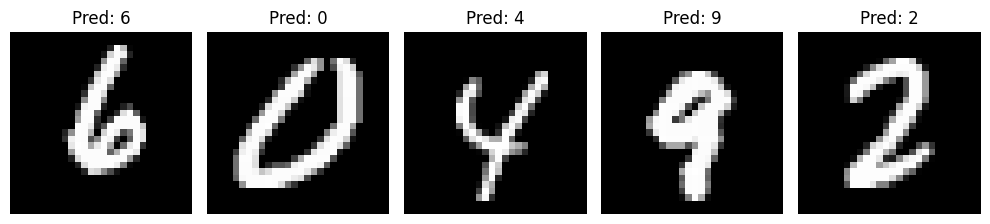

In [1]:
# 📌 Task 2: CNN with TensorFlow on MNIST

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Step 3: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 7: Predict and Visualize 5 random images
predictions = model.predict(x_test)

plt.figure(figsize=(10, 4))
for i in range(5):
    index = np.random.randint(0, len(x_test))
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[index])}")
    plt.axis('off')
plt.tight_layout()
plt.show()
